In [1]:
#!/usr/bin/env python

*********************************************************************<br>
PROGRAM TO PLOT PARTIAL DERIVATIVES OF LOVE NUMBERS (OUTPUT FROM run_pl.py)<br>
LITERATURE: Okubo & Saito (1983), Okubo & Endo (1986), <br>
            Martens et al. (2016, JGR-Solid Earth), Martens (2016, Caltech)<br>
<br>
Copyright (c) 2014-2019: HILARY R. MARTENS, LUIS RIVERA, MARK SIMONS         <br>
<br>
This file is part of LoadDef.<br>
<br>
   LoadDef is free software: you can redistribute it and/or modify<br>
   it under the terms of the GNU General Public License as published by<br>
   the Free Software Foundation, either version 3 of the License, or<br>
   any later version.<br>
<br>
   LoadDef is distributed in the hope that it will be useful,<br>
   but WITHOUT ANY WARRANTY; without even the implied warranty of<br>
   MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the<br>
   GNU General Public License for more details.<br>
<br>
   You should have received a copy of the GNU General Public License<br>
   along with LoadDef.  If not, see <https://www.gnu.org/licenses/>.<br>
<br>
*********************************************************************

MODIFY PYTHON PATH TO INCLUDE 'LoadDef' DIRECTORY

In [2]:
from __future__ import print_function
import sys
import os
sys.path.append(os.getcwd() + "/../../")

Import Python Modules

In [3]:
import matplotlib.pyplot as plt
import matplotlib.colorbar as clb
import matplotlib.cm as cm
from matplotlib.ticker import LinearLocator, MultipleLocator, FormatStrFormatter, MaxNLocator
import numpy as np
import math

## USER INPUT ####

Spherical Harmonic Degree

In [4]:
cn = 2

Type of Love Number (Load = 'lln'; Potential/Tide = 'pln'; Shear = 'sln'; Stress (n=1) = 'sln')

In [5]:
lntype = 'lln'

Earth Model

In [6]:
emod = 'PREM'

Homogeneous Sphere? 

In [7]:
homsph = False; hsvp = 10000.; hsvs = 5000.; hsrho = 5000.

Output Figure Name

In [8]:
figname = ("Partial_Derivatives_"+lntype+"_n"+str(cn)+"_"+emod+".pdf")

Filenames for Partial Derivative Files

In [9]:
partial = ("../../output/Love_Numbers/Partials/"+lntype+"_n"+str(cn)+"_"+emod+"_partials.txt")

Define the "Okubo & Saito (1983)" Normalization Factor

In [10]:
osfact = 1. / (6371./1E4) 

Radius Range (km)<br>
 :: rmin = 3480., n=2; rmin = 5850., n=100 ; rmin = 6330., n=1000 ; rmin = 6366., n=10000

In [11]:
rmin = 3480.; rmax = 6371.
if (cn >= 100.):
    rmin = 5850.; rmax = 6371.
if (cn >= 1000.):
    rmin = 6330.; rmax = 6371.
if (cn >= 10000.):
    rmin = 6366.; rmax = 6371.
if (homsph == True):
    rmin = 80.; rmax = 6371.

Convert to Depth

In [12]:
dmin = 6371.-rmin; dmax = 6371.-rmax
useDepth = True # Toggle between depth and radius

Number of Ticks

In [13]:
numxticks = 5

Tick Spacing (Y-axis)<br>
 :: 500. for n=2; 100. for n=100; 10. for n=1000; 1. for n=10000

In [14]:
ytickspace = 500.
if (homsph == True):
    ytickspace = 1000.
if (cn >= 100.):
    ytickspace = 100.
if (cn >= 1000.):
    ytickspace = 10.
if (cn >= 10000.):
    ytickspace = 1.

Xtick Format

In [15]:
majorFormatter = FormatStrFormatter('%.3G')
xtickrot = 25

Ytick Format

In [16]:
majorFormatterY = FormatStrFormatter('%d')

Optionally Set XLims

In [17]:
setXLim = True
if (setXLim == True):
    if (lntype == 'lln'):
        xmin1 = -3.; xmax1 = 3.
        xmin2 = -1.; xmax2 = 1.
        xmin3 = -2.; xmax3 = 2.
        xmin4 = -2.; xmax4 = 2.
        xmin5 = -2.; xmax5 = 2.
        xmin6 = -1.; xmax6 = 1.
        xmin7 = -10.; xmax7 = 10.
        xmin8 = -16.; xmax8 = 16.
        xmin9 = -5.; xmax9 = 5.
    elif (lntype == 'pln'):
        xmin1 = -3.0; xmax1 = 3.0
        xmin2 = -0.2; xmax2 = 0.2
        xmin3 = -1.6; xmax3 = 1.6
        xmin4 = -1.6; xmax4 = 1.6
        xmin5 = -0.3; xmax5 = 0.3
        xmin6 = -0.5; xmax6 = 0.5
        xmin7 = -5.; xmax7 = 5.
        xmin8 = -1.; xmax8 = 1.
        xmin9 = -3.; xmax9 = 3.
    elif (lntype == 'sln'):
        xmin1 = -1.6; xmax1 = 1.6
        xmin2 = -0.3; xmax2 = 0.3
        xmin3 = -0.5; xmax3 = 0.5
        xmin4 = -2.; xmax4 = 2.
        xmin5 = -1.; xmax5 = 1.
        xmin6 = -16.; xmax6 = 16.
        xmin7 = -1.; xmax7 = 1.
        xmin8 = -2.; xmax8 = 2.
        xmin9 = -1.; xmax9 = 1.
    if (lntype == 'lln'):
        n1xmin1 = -5.; n1xmax1 = 10.
        n1xmin2 = -5.; n1xmax2 = 10.
        n1xmin3 = -5.; n1xmax3 = 10.
        n1xmin4 = -2.; n1xmax4 = 3.
        n1xmin5 = -2.; n1xmax5 = 3.
        n1xmin6 = -2.; n1xmax6 = 3.
    elif (lntype == 'sln'):
        n1xmin1 = -5.; n1xmax1 = 10.
        n1xmin2 = -5.; n1xmax2 = 10.
        n1xmin3 = -5.; n1xmax3 = 10.
        n1xmin4 = -20.; n1xmax4 = 10.
        n1xmin5 = -20.; n1xmax5 = 10.
        n1xmin6 = -20.; n1xmax6 = 10.

## BEGIN CODE 

Create Folder

In [18]:
if not (os.path.isdir("./output/")):
    os.makedirs("./output/")
outdir = "./output/"

If Spherical Harmonic Degree 1 and Shear Love Number Selected, Alert User that the Stress Love Number will be Returned

In [19]:
if ((cn==1) & (lntype=='sln')):
    print(':: NOTE: For Spherical Harmonic Degree 1, the Shear Solution is Replaced by the Stress Solution (See Okubo & Endo [1986]).')

Read the Files

In [20]:
rint,imnd,iknd,irnd,dh_dmu,dh_dK,dh_drho,dl_dmu,dl_dK,dl_drho,dk_dmu,dk_dK,dk_drho = np.loadtxt(partial,unpack=True,skiprows=7)

# Find Depth Below Which Elastic Moduli Sensitivities are < Threshold<br>
threshold = 0.0001<br>
hmu_idx = np.where(np.absolute(dh_dmu)/max(np.absolute(dh_dmu)) < threshold); hmu_idx = hmu_idx[0]<br>
print(('dh_dmu falls below ', threshold, ' at: ', max(rint[hmu_idx]))<br>
lmu_idx = np.where(np.diff(dl_dmu) < threshold); lmu_idx = lmu_idx[0]<br>
print(('diff(dl_dmu) falls below ', threshold, ' at: ', max(rint[lmu_idx]))<br>
hka_idx = np.where(np.absolute(dh_dK)/max(np.absolute(dh_dK)) < threshold); hka_idx = hka_idx[0]<br>
print(('dh_dka falls below ', threshold, ' at: ', max(rint[hka_idx]))<br>
lka_idx = np.where(np.absolute(dl_dK)/max(np.absolute(dl_dK)) < threshold); lka_idx = lka_idx[0]<br>
print(('dl_dka falls below ', threshold, ' at: ', max(rint[lka_idx]))<br>
print(('(r/a)^10000, 3km: ', (6367./6371.)**10000.))<br>
print(('(r/a)^100, 300km: ', (6071./6371.)**100.))

Integrate Partials

In [21]:
int_dh_dmu = np.trapz(dh_dmu,rint)/rint[-1]
int_dl_dmu = np.trapz(dl_dmu,rint)/rint[-1]
int_dk_dmu = np.trapz(dk_dmu,rint)/rint[-1]
int_dh_dka = np.trapz(dh_dK,rint)/rint[-1]
int_dl_dka = np.trapz(dl_dK,rint)/rint[-1]
int_dk_dka = np.trapz(dk_dK,rint)/rint[-1]
int_dh_dro = np.trapz(dh_drho,rint)/rint[-1]
int_dl_dro = np.trapz(dl_drho,rint)/rint[-1]
int_dk_dro = np.trapz(dk_drho,rint)/rint[-1]
print('Integrated dh/dmu: %f' %int_dh_dmu)
print('Integrated dl/dmu: %f' %int_dl_dmu)
print('Integrated dk/dmu: %f' %int_dk_dmu)
print('Integrated dh/dka: %f' %int_dh_dka)
print('Integrated dl/dka: %f' %int_dl_dka)
print('Integrated dk/dka: %f' %int_dk_dka)
print('Integrated dh/dro: %f' %int_dh_dro)
print('Integrated dl/dro: %f' %int_dl_dro)
print('Integrated dk/dro: %f' %int_dk_dro)

Integrated dh/dmu: 0.341049
Integrated dl/dmu: 0.151048
Integrated dk/dmu: 0.140756
Integrated dh/dka: 0.724460
Integrated dl/dka: -0.193006
Integrated dk/dka: 0.088225
Integrated dh/dro: -1.630782
Integrated dl/dro: 0.225962
Integrated dk/dro: -0.483465


Homogeneous Sphere Love Number Perturbations

In [22]:
if (homsph == True):
    mu = (hsvs**2.)*hsrho 
    mupert = mu*0.1 
    rhopert = hsrho*0.1
    # Non-Dimensionalize Parameters
    L_sc = 6371000.                      # radius of Earth
    R_sc = 5500.
    pi = np.pi
    piG = 1.                             # pi*G
    T_sc = 1./(math.sqrt(R_sc*pi*(6.67*(10**(-11.)))))     # time
    ndmupert = mupert/(R_sc*(L_sc**2.)*(T_sc**(-2.)))
    ndrhopert = rhopert/(R_sc)
    # Some Examples
    #print(('Homogeneous Sphere, mu perturbed, non-dimen.: ', ndmupert))
    #print(('Homogeneous Sphere dh, mu pert: ', int_dh_dmu*ndmupert))
    #print(('Homogeneous Sphere dh, rho pert: ', int_dh_dro*ndrhopert))

Convert to Depth

In [23]:
dint = 6371.-rint

Select Radius or Depth

In [24]:
if (useDepth == True):
    rint = dint
    rmin = dmin
    rmax = dmax

Plot Figure

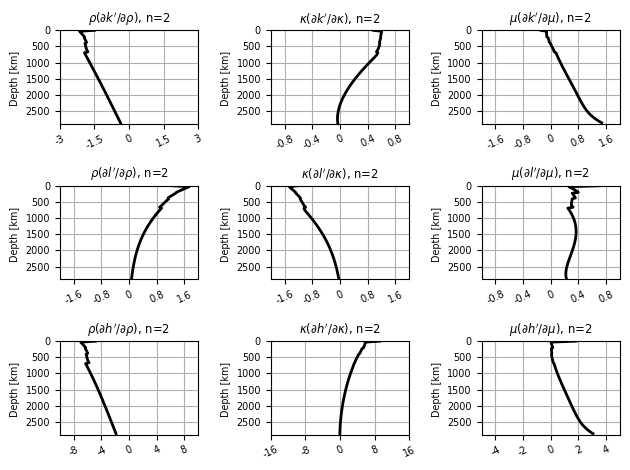

In [25]:
fig1=plt.figure()
if (cn > 1):
    ax = plt.subplot(3,3,9)
    plt.plot(np.multiply(dh_dmu*osfact,imnd),rint,linewidth=2,color='k')
    if (lntype == 'lln'):
        plt.title(r'$\mu (\partial h^\prime$/$\partial \mu)$, n='+str(cn),fontsize='small')
    elif (lntype == 'pln'):
        plt.title(r'$\mu (\partial h$/$\partial \mu)$, n='+str(cn),fontsize='small')
    elif (lntype == 'sln'):
        plt.title(r'$\mu (\partial h^{\prime\prime}$/$\partial \mu)$, n='+str(cn),fontsize='small')
    else:
        sys.exit('Error: Incorrect Love Number Type. Please Specify "lln", "pln" or "sln".')
    plt.ylim([rmin,rmax])
    if (useDepth == True):
        plt.ylabel('Depth [km] ', fontsize='x-small')
    else:
        plt.ylabel('Radius [km] ', fontsize='x-small')
    plt.grid(True)
    if (setXLim == True):
        plt.xlim([xmin9,xmax9])
    plt.tick_params(labelsize='x-small')
    ax.get_xaxis().set_major_locator(MaxNLocator(numxticks))
    ax.get_yaxis().set_major_locator(MultipleLocator(ytickspace))
    ax.get_xaxis().set_major_formatter(majorFormatter)
    ax.get_yaxis().set_major_formatter(majorFormatterY)
    plt.xticks(rotation=xtickrot)
    ax = plt.subplot(3,3,6)
    plt.plot(np.multiply(dl_dmu*osfact,imnd),rint,linewidth=2,color='k')
    if (lntype == 'lln'):
        plt.title(r'$\mu (\partial l^{\prime}$/$\partial \mu)$, n='+str(cn),fontsize='small')
    elif (lntype == 'pln'):
        plt.title(r'$\mu (\partial l$/$\partial \mu)$, n='+str(cn),fontsize='small')
    else:
        plt.title(r'$\mu (\partial l^{\prime\prime}$/$\partial \mu)$, n='+str(cn),fontsize='small')
    plt.ylim([rmin,rmax])
    if (useDepth == True):
        plt.ylabel('Depth [km] ', fontsize='x-small')
    else:
        plt.ylabel('Radius [km] ', fontsize='x-small')
    plt.grid(True)
    if (setXLim == True):
        plt.xlim([xmin6,xmax6])
    plt.tick_params(labelsize='x-small')
    ax.get_xaxis().set_major_locator(MaxNLocator(numxticks))
    ax.get_yaxis().set_major_locator(MultipleLocator(ytickspace))
    ax.get_xaxis().set_major_formatter(majorFormatter)
    ax.get_yaxis().set_major_formatter(majorFormatterY)
    plt.xticks(rotation=xtickrot)
    ax = plt.subplot(3,3,8)
    plt.plot(np.multiply(dh_dK*osfact,iknd),rint,linewidth=2,color='k')
    if (lntype == 'lln'):
        plt.title(r'$\kappa (\partial h^{\prime}$/$\partial \kappa)$, n='+str(cn),fontsize='small')
    elif (lntype == 'pln'):
        plt.title(r'$\kappa (\partial h$/$\partial \kappa)$, n='+str(cn),fontsize='small')
    else: 
        plt.title(r'$\kappa (\partial h^{\prime\prime}$/$\partial \kappa)$, n='+str(cn),fontsize='small')
    plt.ylim([rmin,rmax])
    if (useDepth == True):
        plt.ylabel('Depth [km] ', fontsize='x-small')
    else:
        plt.ylabel('Radius [km] ', fontsize='x-small')    
    plt.grid(True)
    if (setXLim == True):
        plt.xlim([xmin8,xmax8])
    plt.tick_params(labelsize='x-small')
    ax.get_xaxis().set_major_locator(MaxNLocator(numxticks))
    ax.get_yaxis().set_major_locator(MultipleLocator(ytickspace))
    ax.get_xaxis().set_major_formatter(majorFormatter)
    ax.get_yaxis().set_major_formatter(majorFormatterY)
    plt.xticks(rotation=xtickrot)
    ax = plt.subplot(3,3,5)
    plt.plot(np.multiply(dl_dK*osfact,iknd),rint,linewidth=2,color='k')
    if (lntype == 'lln'):
        plt.title(r'$\kappa (\partial l^{\prime}$/$\partial \kappa)$, n='+str(cn),fontsize='small')
    elif (lntype == 'pln'):
        plt.title(r'$\kappa (\partial l$/$\partial \kappa)$, n='+str(cn),fontsize='small')
    else:
        plt.title(r'$\kappa (\partial l^{\prime\prime}$/$\partial \kappa)$, n='+str(cn),fontsize='small')
    plt.ylim([rmin,rmax])
    if (useDepth == True):
        plt.ylabel('Depth [km] ', fontsize='x-small')
    else:
        plt.ylabel('Radius [km] ', fontsize='x-small')    
    plt.grid(True)
    if (setXLim == True):
        plt.xlim([xmin5,xmax5])
    plt.tick_params(labelsize='x-small')
    ax.get_xaxis().set_major_locator(MaxNLocator(numxticks))
    ax.get_yaxis().set_major_locator(MultipleLocator(ytickspace))
    ax.get_xaxis().set_major_formatter(majorFormatter)
    ax.get_yaxis().set_major_formatter(majorFormatterY)
#    ax.axhline(y=0, color='k')
#    ax.axvline(x=0, color='k')
    plt.xticks(rotation=xtickrot)
    ax = plt.subplot(3,3,7)
    plt.plot(np.multiply(dh_drho*osfact,irnd),rint,linewidth=2,color='k')
    if (lntype == 'lln'):
        plt.title(r'$\rho (\partial h^{\prime}$/$\partial \rho)$, n='+str(cn),fontsize='small')
    elif (lntype == 'pln'):
        plt.title(r'$\rho (\partial h$/$\partial \rho)$, n='+str(cn),fontsize='small')
    else:
        plt.title(r'$\rho (\partial h^{\prime\prime}$/$\partial \rho)$, n='+str(cn),fontsize='small')
    plt.ylim([rmin,rmax])
    if (useDepth == True):
        plt.ylabel('Depth [km] ', fontsize='x-small')
    else:
        plt.ylabel('Radius [km] ', fontsize='x-small')    
    plt.grid(True)
    if (setXLim == True):
        plt.xlim([xmin7,xmax7])
    plt.tick_params(labelsize='x-small')
    ax.get_xaxis().set_major_locator(MaxNLocator(numxticks))
    ax.get_yaxis().set_major_locator(MultipleLocator(ytickspace))
    ax.get_xaxis().set_major_formatter(majorFormatter)
    ax.get_yaxis().set_major_formatter(majorFormatterY)
    plt.xticks(rotation=xtickrot)
    ax = plt.subplot(3,3,4) 
    plt.plot(np.multiply(dl_drho*osfact,irnd),rint,linewidth=2,color='k')
    if (lntype == 'lln'):
        plt.title(r'$\rho (\partial l^{\prime}$/$\partial \rho)$, n='+str(cn),fontsize='small')
    elif (lntype == 'pln'):
        plt.title(r'$\rho (\partial l$/$\partial \rho)$, n='+str(cn),fontsize='small')
    else:
        plt.title(r'$\rho (\partial l^{\prime\prime}$/$\partial \rho)$, n='+str(cn),fontsize='small')
    plt.ylim([rmin,rmax])
    if (useDepth == True):
        plt.ylabel('Depth [km] ', fontsize='x-small')
    else:
        plt.ylabel('Radius [km] ', fontsize='x-small')
    plt.grid(True)
    if (setXLim == True):
        plt.xlim([xmin4,xmax4])
    plt.tick_params(labelsize='x-small')
    ax.get_xaxis().set_major_locator(MaxNLocator(numxticks))
    ax.get_yaxis().set_major_locator(MultipleLocator(ytickspace))
    ax.get_xaxis().set_major_formatter(majorFormatter)
    ax.get_yaxis().set_major_formatter(majorFormatterY)
    plt.xticks(rotation=xtickrot)
    ax = plt.subplot(3,3,1)
    plt.plot(np.multiply(dk_drho*osfact,irnd),rint,linewidth=2,color='k')
    if (lntype == 'lln'):
        plt.title(r'$\rho (\partial k^{\prime}$/$\partial \rho)$, n='+str(cn),fontsize='small')
    elif (lntype == 'pln'):
        plt.title(r'$\rho (\partial k$/$\partial \rho)$, n='+str(cn),fontsize='small')
    else:
        plt.title(r'$\rho (\partial k^{\prime\prime}$/$\partial \rho)$, n='+str(cn),fontsize='small')
    plt.ylim([rmin,rmax])
    if (useDepth == True):
        plt.ylabel('Depth [km] ', fontsize='x-small')
    else:
        plt.ylabel('Radius [km] ', fontsize='x-small')
    plt.grid(True)
    if (setXLim == True):
        plt.xlim([xmin1,xmax1])
    plt.tick_params(labelsize='x-small')
    ax.get_xaxis().set_major_locator(MaxNLocator(numxticks))
    ax.get_yaxis().set_major_locator(MultipleLocator(ytickspace))
    ax.get_xaxis().set_major_formatter(majorFormatter)
    ax.get_yaxis().set_major_formatter(majorFormatterY)
    plt.xticks(rotation=xtickrot)
    ax = plt.subplot(3,3,2)
    plt.plot(np.multiply(dk_dK*osfact,iknd),rint,linewidth=2,color='k')
    if (lntype == 'lln'):
        plt.title(r'$\kappa (\partial k^{\prime}$/$\partial \kappa)$, n='+str(cn),fontsize='small')
    elif (lntype == 'pln'):
        plt.title(r'$\kappa (\partial k$/$\partial \kappa)$, n='+str(cn),fontsize='small')
    else:
        plt.title(r'$\kappa (\partial k^{\prime\prime}$/$\partial \kappa)$, n='+str(cn),fontsize='small')
    plt.ylim([rmin,rmax])
    if (useDepth == True):
        plt.ylabel('Depth [km] ', fontsize='x-small')
    else:
        plt.ylabel('Radius [km] ', fontsize='x-small')    
    plt.grid(True)
    if (setXLim == True):
        plt.xlim([xmin2,xmax2])
    plt.tick_params(labelsize='x-small')
    ax.get_xaxis().set_major_locator(MaxNLocator(numxticks))
    ax.get_yaxis().set_major_locator(MultipleLocator(ytickspace))
    ax.get_xaxis().set_major_formatter(majorFormatter)
    ax.get_yaxis().set_major_formatter(majorFormatterY)
    plt.xticks(rotation=xtickrot)
    ax = plt.subplot(3,3,3)
    plt.plot(np.multiply(dk_dmu*osfact,imnd),rint,linewidth=2,color='k')
    if (lntype == 'lln'):
        plt.title(r'$\mu (\partial k^{\prime}$/$\partial \mu)$, n='+str(cn),fontsize='small')
    elif (lntype == 'pln'):
        plt.title(r'$\mu (\partial k$/$\partial \mu)$, n='+str(cn),fontsize='small')
    else:
        plt.title(r'$\mu (\partial k^{\prime\prime}$/$\partial \mu)$, n='+str(cn),fontsize='small')
    plt.ylim([rmin,rmax])
    if (useDepth == True):
        plt.ylabel('Depth [km] ', fontsize='x-small')
    else:
        plt.ylabel('Radius [km] ', fontsize='x-small')    
    plt.grid(True)
    if (setXLim == True):
        plt.xlim([xmin3,xmax3])
    plt.tight_layout()
    plt.tick_params(labelsize='x-small')
    ax.get_xaxis().set_major_locator(MaxNLocator(numxticks))
    ax.get_yaxis().set_major_locator(MultipleLocator(ytickspace))
    ax.get_xaxis().set_major_formatter(majorFormatter)
    ax.get_yaxis().set_major_formatter(majorFormatterY)
    plt.xticks(rotation=xtickrot)
else:
    ax = plt.subplot(2,3,3)
    plt.plot(np.multiply(dh_dmu*osfact,imnd),rint,linewidth=2,color='k')
    if (lntype == 'lln'):
        plt.title(r'$\mu (\partial h^{\prime}$/$\partial \mu)$, n='+str(cn),fontsize='small')
    elif (lntype == 'pln'):
        plt.title(r'$\mu (\partial h$/$\partial \mu)$, n='+str(cn),fontsize='small')
    elif (lntype == 'sln'):
        plt.title(r'$\mu (\partial h^{\prime\prime\prime}$/$\partial \mu)$, n='+str(cn),fontsize='small')
    else:
        sys.exit('Error: Incorrect Love Number Type. Please Specify "lln", "pln" or "sln".')    
    plt.ylim([rmin,rmax])
    plt.grid(True)
    if (useDepth == True):
        plt.ylabel('Depth [km] ', fontsize='x-small')
    else:
        plt.ylabel('Radius [km] ', fontsize='x-small')    
    if (setXLim == True):
        plt.xlim([n1xmin3,n1xmax3])
        numxticks = 3
    plt.tick_params(labelsize='x-small')
    ax.get_xaxis().set_major_locator(MaxNLocator(numxticks))
    ax.get_yaxis().set_major_locator(MultipleLocator(ytickspace))
    ax.get_xaxis().set_major_formatter(majorFormatter)
    ax.get_yaxis().set_major_formatter(majorFormatterY)
    plt.xticks(rotation=xtickrot)
    ax = plt.subplot(2,3,6)
    plt.plot(np.multiply(dl_dmu*osfact,imnd),rint,linewidth=2,color='k')
    if (lntype == 'lln'):
        plt.title(r'$\mu (\partial l^{\prime}$/$\partial \mu)$, n='+str(cn),fontsize='small')
    elif (lntype == 'pln'):
        plt.title(r'$\mu (\partial l$/$\partial \mu)$, n='+str(cn),fontsize='small')
    else:
        plt.title(r'$\mu (\partial l^{\prime\prime\prime}$/$\partial \mu)$, n='+str(cn),fontsize='small')
    plt.ylim([rmin,rmax])
    plt.grid(True)
    if (useDepth == True):
        plt.ylabel('Depth [km] ', fontsize='x-small')
    else:
        plt.ylabel('Radius [km] ', fontsize='x-small')    
    plt.tick_params(labelsize='x-small')
    if (setXLim == True):
        plt.xlim([n1xmin6,n1xmax6])
        if (lntype == 'sln'):
            numxticks = 3
        if (lntype == 'lln'):
            numxticks = 5
    ax.get_xaxis().set_major_locator(MaxNLocator(numxticks))
    ax.get_yaxis().set_major_locator(MultipleLocator(ytickspace))
    ax.get_xaxis().set_major_formatter(majorFormatter)
    ax.get_yaxis().set_major_formatter(majorFormatterY)
    plt.xticks(rotation=xtickrot)
    ax = plt.subplot(2,3,2)
    plt.plot(np.multiply(dh_dK*osfact,iknd),rint,linewidth=2,color='k')
    if (lntype == 'lln'):
        plt.title(r'$\kappa (\partial h^{\prime}$/$\partial \kappa)$, n='+str(cn),fontsize='small')
    elif (lntype == 'pln'):
        plt.title(r'$\kappa (\partial h$/$\partial \kappa)$, n='+str(cn),fontsize='small')
    else:
        plt.title(r'$\kappa (\partial h^{\prime\prime\prime}$/$\partial \kappa)$, n='+str(cn),fontsize='small')
    plt.ylim([rmin,rmax])
    plt.grid(True)
    if (useDepth == True):
        plt.ylabel('Depth [km] ', fontsize='x-small')
    else:
        plt.ylabel('Radius [km] ', fontsize='x-small')    
    plt.tick_params(labelsize='x-small')
    if (setXLim == True):
        plt.xlim([n1xmin2,n1xmax2])
        numxticks = 3
    ax.get_xaxis().set_major_locator(MaxNLocator(numxticks))
    ax.get_yaxis().set_major_locator(MultipleLocator(ytickspace))
    ax.get_xaxis().set_major_formatter(majorFormatter)
    ax.get_yaxis().set_major_formatter(majorFormatterY)
    plt.xticks(rotation=xtickrot)
    ax = plt.subplot(2,3,5)
    plt.plot(np.multiply(dl_dK*osfact,iknd),rint,linewidth=2,color='k')
    if (lntype == 'lln'):
        plt.title(r'$\kappa (\partial l^{\prime}$/$\partial \kappa)$, n='+str(cn),fontsize='small')
    elif (lntype == 'pln'):
        plt.title(r'$\kappa (\partial l$/$\partial \kappa)$, n='+str(cn),fontsize='small')
    else:
        plt.title(r'$\kappa (\partial l^{\prime\prime\prime}$/$\partial \kappa)$, n='+str(cn),fontsize='small')
    plt.ylim([rmin,rmax])
    plt.grid(True)
    if (useDepth == True):
        plt.ylabel('Depth [km] ', fontsize='x-small')
    else:
        plt.ylabel('Radius [km] ', fontsize='x-small')    
    plt.tick_params(labelsize='x-small')
    if (setXLim == True):
        plt.xlim([n1xmin5,n1xmax5])
        if (lntype == 'sln'):
            numxticks = 3
        if (lntype == 'lln'):
            numxticks = 5
    ax.get_xaxis().set_major_locator(MaxNLocator(numxticks))
    ax.get_yaxis().set_major_locator(MultipleLocator(ytickspace))
    ax.get_xaxis().set_major_formatter(majorFormatter)
    ax.get_yaxis().set_major_formatter(majorFormatterY)
    plt.xticks(rotation=xtickrot)
    ax = plt.subplot(2,3,1)
    plt.plot(np.multiply(dh_drho*osfact,irnd),rint,linewidth=2,color='k')
    if (lntype == 'lln'):
        plt.title(r'$\rho (\partial h^{\prime}$/$\partial \rho)$, n='+str(cn),fontsize='small')
    elif (lntype == 'pln'):
        plt.title(r'$\rho (\partial h$/$\partial \rho)$, n='+str(cn),fontsize='small')
    else:
        plt.title(r'$\rho (\partial h^{\prime\prime\prime}$/$\partial \rho)$, n='+str(cn),fontsize='small')
    plt.ylim([rmin,rmax])
    plt.grid(True)
    if (useDepth == True):
        plt.ylabel('Depth [km] ', fontsize='x-small')
    else:
        plt.ylabel('Radius [km] ', fontsize='x-small')    
    plt.tick_params(labelsize='x-small')
    if (setXLim == True):
        plt.xlim([n1xmin1,n1xmax1])
        numxticks = 3
    ax.get_xaxis().set_major_locator(MaxNLocator(numxticks))
    ax.get_yaxis().set_major_locator(MultipleLocator(ytickspace))
    ax.get_xaxis().set_major_formatter(majorFormatter)
    ax.get_yaxis().set_major_formatter(majorFormatterY)
    plt.xticks(rotation=xtickrot)
    ax = plt.subplot(2,3,4)
    plt.plot(np.multiply(dl_drho*osfact,irnd),rint,linewidth=2,color='k')
    if (lntype == 'lln'):
        plt.title(r'$\rho (\partial l^{\prime}$/$\partial \rho)$, n='+str(cn),fontsize='small')
    elif (lntype == 'pln'):
        plt.title(r'$\rho (\partial l$/$\partial \rho)$, n='+str(cn),fontsize='small')
    else:
        plt.title(r'$\rho (\partial l^{\prime\prime\prime}$/$\partial \rho)$, n='+str(cn),fontsize='small')
    plt.ylim([rmin,rmax])
    plt.grid(True)
    if (useDepth == True):
        plt.ylabel('Depth [km] ', fontsize='x-small')
    else:
        plt.ylabel('Radius [km] ', fontsize='x-small')    
    plt.tick_params(labelsize='x-small')
    if (setXLim == True):
        plt.xlim([n1xmin4,n1xmax4])
        if (lntype == 'sln'):
            numxticks = 3
        if (lntype == 'lln'):
            numxticks = 5
    ax.get_xaxis().set_major_locator(MaxNLocator(numxticks))
    ax.get_yaxis().set_major_locator(MultipleLocator(ytickspace))
    ax.get_xaxis().set_major_formatter(majorFormatter)
    ax.get_yaxis().set_major_formatter(majorFormatterY)
    plt.xticks(rotation=xtickrot)
plt.tight_layout()
plt.savefig((outdir+figname),orientation='landscape',format='pdf')
plt.show()